# Create the land mask for my CMIP6 regrid area

In [10]:
import xarray
import numpy

In [4]:
import helpers.fileHandler as fh

In [14]:
cesmLandXr=fh.loadModelData('CESM2','sftlf_fx','historical','r1i1p1f1_gn')

/g/data/oi10/replicas/CMIP6/CMIP/NCAR/CESM2/historical/r1i1p1f1/fx/sftlf/gn/v20190308
b'/g/data/oi10/replicas/CMIP6/CMIP/NCAR/CESM2/historical/r1i1p1f1/fx/sftlf/gn/v20190308/sftlf_fx_CESM2_historical_r1i1p1f1_gn.nc\n'
['/g/data/oi10/replicas/CMIP6/CMIP/NCAR/CESM2/historical/r1i1p1f1/fx/sftlf/gn/v20190308/sftlf_fx_CESM2_historical_r1i1p1f1_gn.nc']


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'sftlf' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [6]:
import xesmf as xe

In [11]:
#the lon/lat grid we are going to use for all models
regridXr=xarray.Dataset({'lat': (['lat'], numpy.arange(-50, 0, 1.5)),
                     'lon': (['lon'], numpy.arange(100, 170, 1.5)),
                    }
                   )


In [15]:
#regrid before processing
regridder = xe.Regridder(cesmLandXr, regridXr, 'bilinear')

In [17]:
newXr=regridder(cesmLandXr)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/xesmf/frontend.py:496: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


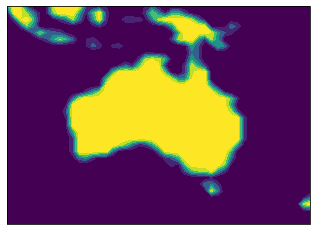

In [24]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

ax=plt.subplot(projection=ccrs.PlateCarree())
cs=plt.contourf(
    newXr.lon, newXr.lat, newXr.sftlf , 
    transform=ccrs.PlateCarree(), extend='both'
)

In [27]:
newXr.to_netcdf('helpers/cmip6LandMask.nc')

In [28]:
newXr.sftlf

<xarray.DataArray 'sftlf' (lat: 34, lon: 47)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        11.22517957, 11.99743208],
       ...,
       [ 0.        , 22.27019085, 88.54279286, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 92.58460631, 95.5373064 , ...,  0.        ,
         0.        ,  0.        ],
       [49.46193504, 99.9999234 , 88.00593431, ...,  0.        ,
         0.        ,  0.        ]])
Coordinates:
  * lon      (lon) float64 100.0 101.5 103.0 104.5 ... 164.5 166.0 167.5 169.0
  * lat      (lat) float64 -50.0 -48.5 -47.0 -45.5 -44.0 ... -5.0 -3.5 -2.0 -0.5